<a href="https://colab.research.google.com/github/mevangelista-alvarado/Python_Notas/blob/master/Intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

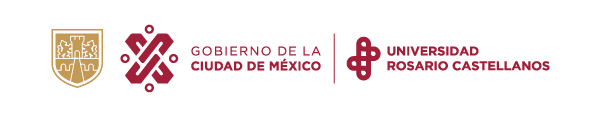

**Actualizado:** Septiembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Módulo `Pandas`

Pandas es una librería de código abierto utilizada dentro del ámbito de Data Science y Machine Learning, ya que ofrece unas estructuras muy poderosas y flexibles que facilitan la manipulación y tratamiento de datos.






Pandas surgió como necesidad de aunar en una única librería todo lo necesario para que un analista de datos pudiese tener en una misma herramienta todas las funcionalidades que necesitaba en su día a día, como son: cargar datos, modelar, analizar, manipular y prepararlos.



El nombre _Pandas_ es en realidad una contracción del término _Panel Data_



Su principal desarrollador, Wes McKinney, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en AQR Capital

La estructura y algunas ideas de este material se tomaron del siguiente tutorial: https://pandas.pydata.org/docs/user_guide/10min.html

Importamos el módulo de la siguiente manera:

In [ ]:
import numpy as np
import pandas as pd

## Estructuras de datos básicas en pandas


Pandas proporciona dos tipos de clases para manejar datos:

__Series__: una matriz etiquetada unidimensional que contiene datos de cualquier tipo como números enteros, cadenas, objetos Python, etc.

__DataFrame__: una estructura de datos bidimensional que contiene datos como una matriz bidimensional o una tabla con filas y columnas.

## Creación de objetos

Crear __Series__ pasando una lista de valores, permitiendo que pandas cree un valor predeterminado `RangeIndex`.



In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

Crear DataFramepasando una matriz NumPy con un índice de fecha y hora usando date_range() columnas etiquetadas:



In [ ]:
dates = pd.date_range("20130101", periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

Crear __DataFrame__ pasando un diccionario de objetos donde las claves son las etiquetas de las columnas y los valores son los valores de las columnas.

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

Las columnas del resultado __DataFrame__ tienen diferentes tipos :



In [ ]:
df2.dtypes

## Visualizando datos

Utilice `DataFrame.head()` y `DataFrame.tail()` para ver las filas superior e inferior del marco respectivamente:

In [ ]:
df.head()

In [ ]:
df.tail(3)

Mostrar el `DataFrame.index` o `DataFrame.columns`:

In [ ]:
df.index

In [ ]:
df.columns

`describe()` muestra un resumen estadístico rápido de sus datos:

In [ ]:
df.describe()

Transponiendo sus datos:

In [ ]:
df.T

`DataFrame.sort_values()` ordena por valores:

In [ ]:
df.sort_values(by="B")

## Selección

Para un `DataFrame`, al pasar una sola etiqueta se selecciona una columna y se obtiene un `Series` equivalente a df.A:

In [ ]:
df["A"]

Para un `DataFrame`, al usar `:` se seleccionan filas coincidentes:

In [ ]:
df[0:3]

In [ ]:
df["20130102":"20130103"]

## Selección por etiqueta

Seleccionar una fila que coincida con una etiqueta:

In [ ]:
label = dates[0]
label

In [ ]:
df.loc[dates[0]]

Seleccionar todas las filas `:` con etiquetas de columna seleccionadas:

In [ ]:
df.loc[:, ["A", "B"]]

Para el corte de etiquetas, se incluyen ambos puntos finales :

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

Al seleccionar una sola etiqueta de fila y columna se devuelve un escalar:

In [ ]:
df.loc[dates[0], "A"]

equivalente al método anterior

In [ ]:
df.at[dates[0], "A"]

**OBS.**  

Los sectores enteros actúan de manera similar a NumPy/Python.

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[3:5, :]

In [ ]:
df.iloc[:, 0:2]

## Indexación booleana

Seleccione filas donde `df.A` sea mayor que `0`.

In [ ]:
df[df["A"] > 0]

Seleccionar valores de `DataFrame` donde se cumple una condición booleana:

In [ ]:
df[df > 0]

### Método de uso `isin()` para filtrar:

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

In [ ]:
df2[df2["E"].isin(["two", "four"])]

## Operaciones

Calcule el valor medio para cada columna:

In [ ]:
df.mean()

Calcule el valor medio para cada fila:

In [ ]:
df.mean(axis=1)

In [ ]:
df.std()

In [ ]:
df.min()

In [ ]:
df.max(axis=1)

## Funciones definidas por el usuario

`DataFrame.agg()` y `DataFrame.transform()` aplica una función definida por el usuario que reduce o transmite su resultado respectivamente.

In [ ]:
df.agg(lambda x: np.mean(x) * 0.5)

In [ ]:
df.agg(lambda x: np.mean(x) * 0.5, axis=1)

In [ ]:
df.transform(lambda x: x * 100)

## Importar y exportar datos

Escribir en un archivo csv:

In [ ]:
df.to_csv("foo.csv")

In [ ]:
df

Lectura de un archivo csv:

In [ ]:
pd.read_csv("foo.csv")

Lectura y escritura en Excel.

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=0)

## Plotting

Usamos la convención estándar para hacer referencia a la API matplotlib

In [ ]:
import matplotlib.pyplot as plt


Plot solo una columna

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

`Plot` todas las columnas:

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best');

`df.cumsum()` devuelve la suma acumulada sobre el eje del `DataFrame`.